# **Moon lander (2D) Example**
(c) 2023 Devakumar Thammisetty

MPOPT is an open-source Multi-phase Optimal Control Problem (OCP) solver based on pseudo-spectral collocation with customized adaptive grid refinement techniques.

Tip: Ctrl + Tab (For the documentation of commands/syntax)

Install mpopt from pypi using the following. Disable after first usage

Import mpopt (Contains main solver modules)

In [1]:
#!pip install mpopt
from mpopt import mp

## Defining OCP


The Fuel optimal solution to the moon-lander OCP is known to have bang-bang thrust profile. The selected OCP has one discontinuity.



   \begin{aligned}
   &\min_{x, u}        & \qquad & J = 0 + \int_{t_0}^{t_f}u\ dt\\
   &\text{subject to} &      & \dot{x_0} = x_1; \dot{x_1} = u - 1.5\\
    &                 &     & x_0(t_f) = 0; \ x_1(t_f) = 0\\
   &                  &      & x_0(t_0) = 10; \ x_1(t_0) = -2\\
   &                  &       & x_0 \geq 0; 0 \leq u \leq 3\\
&                 &     & t_0 = 0.0; t_f = \text{free variable}
  \end{aligned}



We first create an OCP object and then polulate the object with dynamics, path_constraints, terminal_constraints and objective (running_costs, terminal_costs)

In [2]:
ocp = mp.OCP(n_states=2, n_controls=1, n_phases=1)

In [3]:
ocp.dynamics[0] = lambda x, u, t: [x[1], u[0] - 1.5]

In [4]:
ocp.running_costs[0] = lambda x, u, t: u[0]

In [5]:
ocp.terminal_constraints[0] = lambda xf, tf, x0, t0: [xf[0], xf[1]]

Initial state

In [6]:
ocp.x00[0] = [10.0, -2.0]

Box constraints

In [7]:
ocp.lbx[0][0] = 0.0
ocp.lbu[0], ocp.ubu[0] = 0, 3

In [8]:
ocp.validate()

### Solve and plot the results in one line

Lets solve the OCP using following pseudo-spectral approximation
* Collocation using Legendre-Gauss-Radau roots
* Let's plot the position and velocity evolution with time starting from 0.

The OCP is a free final time formulation, 


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

Total number of variables............................:      182
                     variables with only lower bounds:       61
                variables with lower and upper bounds:       61
                     variables with only upper bounds:        0
Total number of equality constraints.................:      124
Total number of inequality constraints...............:       60
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:       60
        inequality constraints with only upper bounds:        0


Number of Iterations....: 32

    

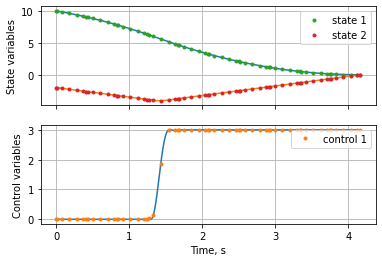

In [9]:
mpo, post = mp.solve(ocp, n_segments=10, poly_orders=6, scheme="LGR", plot=True)

Lets retrive the solution to see the terminal time. 

x: states, u: Controls, t:time, a:Algebraic variables in case OCP has differential algebraic equations (DAEs)

Last element of t and x gives the terminal values. Exact terminal time from the analytical solution is 4.1641s.

In [10]:
x, u, t, a = post.get_data()
print(f"Terminal time, state : {t[-1][0]:.4f} vs 4.1641s (Exact), {x[-1]}")

Terminal time, state : 4.1652 vs 4.1641s (Exact), [9.85970078e-37 0.00000000e+00]


## Solve again with Chebyshev-Gauss-Lobatto (CGL) roots

Total number of variables............................:      182
                     variables with only lower bounds:       61
                variables with lower and upper bounds:       61
                     variables with only upper bounds:        0
Total number of equality constraints.................:      124
Total number of inequality constraints...............:       60
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:       60
        inequality constraints with only upper bounds:        0


Number of Iterations....: 41

                                   (scaled)                 (unscaled)
Objective...............:   8.2457172048588543e+00    8.2457172048588543e+00
Dual infeasibility......:   1.3972013274602247e-12    1.3972013274602247e-12
Constraint violation....:   3.4862335240859466e-11    3.4862335240859466e-11
Complementarity.........:   3.9978925923296842e-09    3.9978925923296842e-09
Overall NLP e

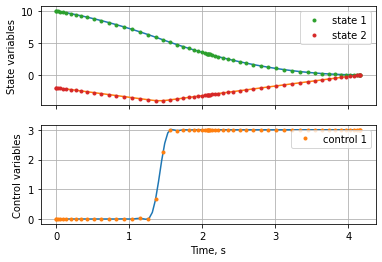

In [11]:
mpo, post = mp.solve(ocp, n_segments=2, poly_orders=30, scheme="CGL", plot=True)

In [12]:
x, u, t, a = post.get_data()
print(f"Terminal time, state : {t[-1][0]:.4f} vs 4.1641s (Exact), {x[-1]}")

Terminal time, state : 4.1661 vs 4.1641s (Exact), [0. 0.]


## Solve again with Legendre-Gauss-Lobatto (LGL) roots

Total number of variables............................:      182
                     variables with only lower bounds:       61
                variables with lower and upper bounds:       61
                     variables with only upper bounds:        0
Total number of equality constraints.................:      124
Total number of inequality constraints...............:       60
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:       60
        inequality constraints with only upper bounds:        0


Number of Iterations....: 42

                                   (scaled)                 (unscaled)
Objective...............:   8.2425586640613506e+00    8.2425586640613506e+00
Dual infeasibility......:   6.8055248936271795e-11    6.8055248936271795e-11
Constraint violation....:   6.9194650009762881e-12    8.8133944586843427e-12
Complementarity.........:   4.7886457777884481e-09    4.7886457777884481e-09
Overall NLP e

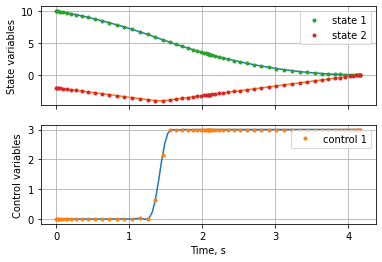

In [13]:
mpo, post = mp.solve(ocp, n_segments=2, poly_orders=30, scheme="LGL", plot=True)

In [14]:
x, u, t, a = post.get_data()
print(f"Terminal time, state : {t[-1][0]:.4f} vs 4.1641s (Exact), {x[-1]}")

Terminal time, state : 4.1662 vs 4.1641s (Exact), [3.68621737e-35 0.00000000e+00]
